In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\Desktop\\sample-chocolate-sales-data-1.csv")

In [5]:
df.shape
df.head(5)

,Sales Person,Product,Country,Date,Amount,Boxes,Order Status
0,Jehu Rudeforth,White Choc,USA,02-Jan-23,5879.25,236,Delivered
1,Roddy Speechley,Choco Coated Almonds,UK,02-Jan-23,2110.50,141,Delivered
2,Oby Sorrel,Raspberry Choco,UK,02-Jan-23,9058.50,906,Cancelled
3,Camilla Castle,50% Dark Bites,USA,02-Jan-23,1228.50,73,Delivered
4,Madelene Upcott,Baker's Choco Chips,Canada,02-Jan-23,5451.75,321,Delivered


In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

df.head()
df["total_sales"] = df["amount"]
df["total_sales"].sum()

np.float64(27990857.25)

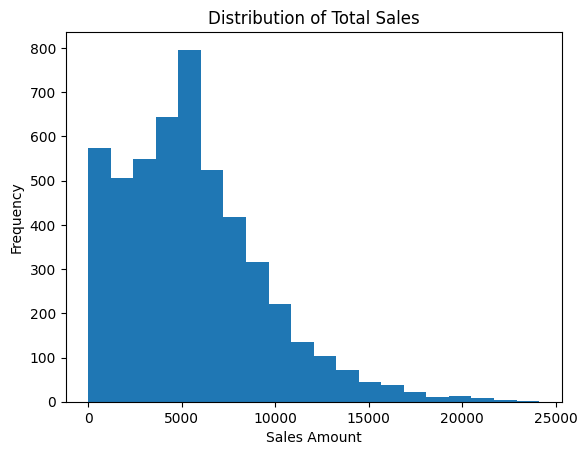

In [9]:
df["total_sales"].plot(kind="hist", bins=20)
plt.title("Distribution of Total Sales")
plt.xlabel("Sales Amount")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20836\828751704.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["order_date"] = pd.to_datetime(df["date"])


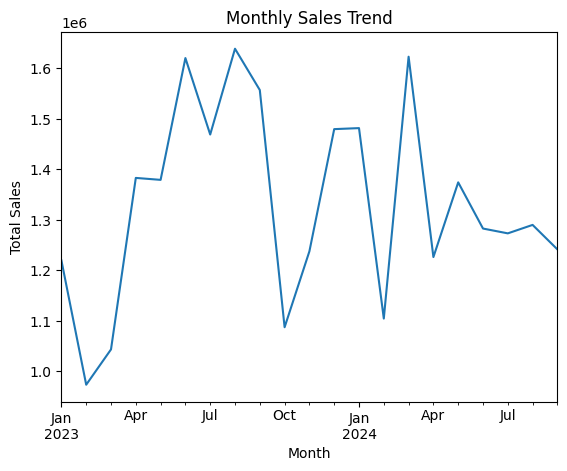

In [10]:
df["order_date"] = pd.to_datetime(df["date"])
monthly_sales = df.groupby(df["order_date"].dt.to_period("M"))["total_sales"].sum()
monthly_sales.plot(kind="line")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

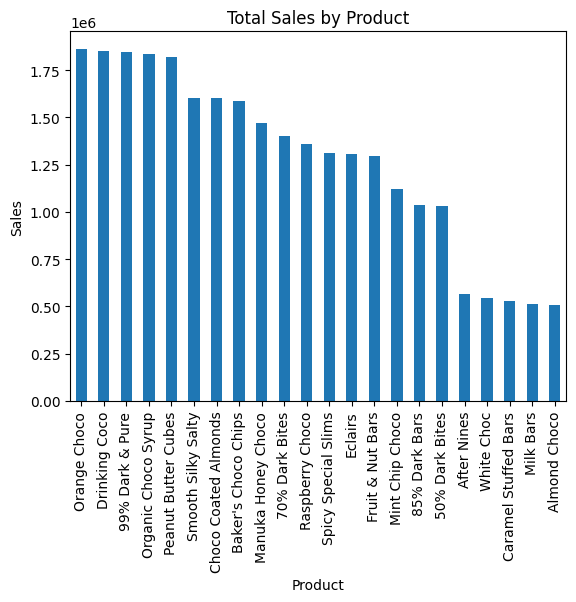

In [11]:
product_sales = df.groupby("product")["total_sales"].sum().sort_values(ascending=False)

product_sales.plot(kind="bar")
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()

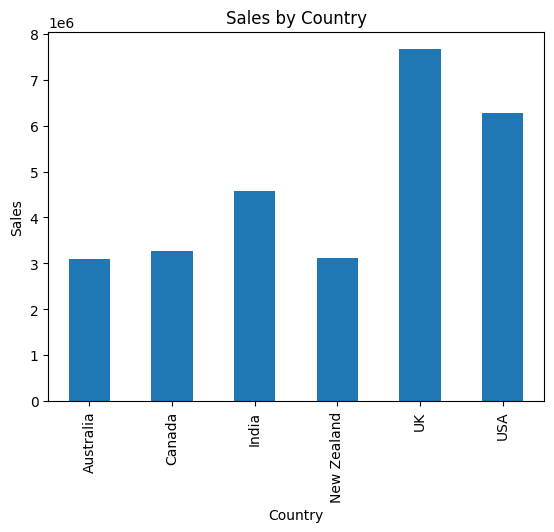

In [12]:
country_sales = df.groupby("country")["total_sales"].sum()

country_sales.plot(kind="bar")
plt.title("Sales by Country")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.show()

In [13]:
df.groupby("sales_person")["total_sales"].sum().sort_values(ascending=False).head(10)

sales_person
Brien Boise        2170955.25
Madelene Upcott    2025711.00
Dotty Strutley     1665866.25
Gunar Cockshoot    1639838.25
Kelci Walkden      1575065.25
Roddy Speechley    1545142.50
Husein Augar       1387176.75
Barr Faughny       1250466.75
Wilone O'Kielt     1218305.25
Beverie Moffet     1207449.00
Name: total_sales, dtype: float64

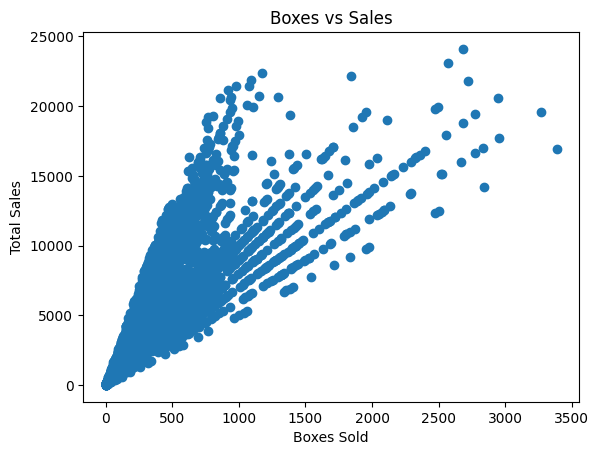

In [14]:
plt.scatter(df["boxes"], df["total_sales"])
plt.xlabel("Boxes Sold")
plt.ylabel("Total Sales")
plt.title("Boxes vs Sales")
plt.show()

In [17]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
display(correlation_matrix)

,amount,boxes,total_sales
amount,1.000000,0.766739,1.000000
boxes,0.766739,1.000000,0.766739
total_sales,1.000000,0.766739,1.000000


In [19]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

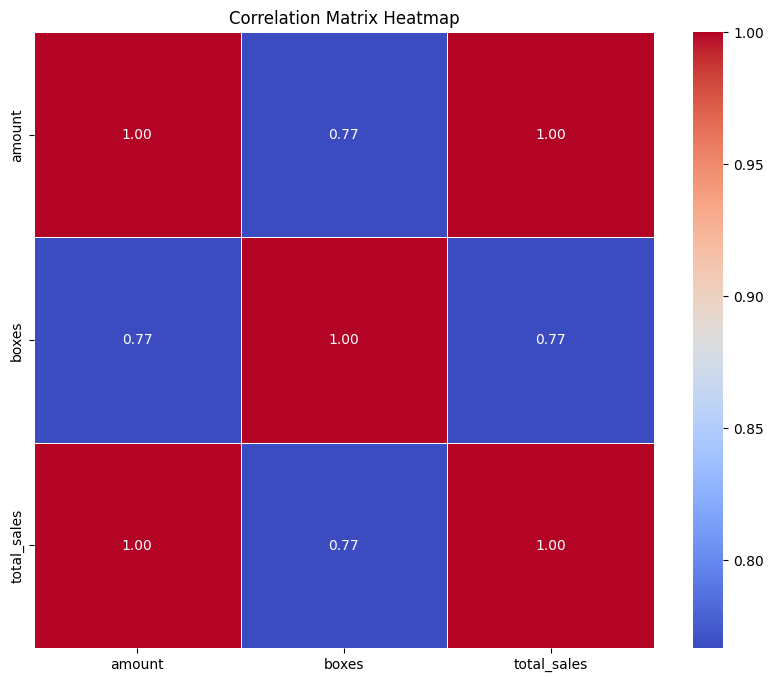

In [20]:
plt.figure(figsize=(10, 8))  
sns.heatmap(
    correlation_matrix, 
    annot=True,          
    cmap='coolwarm',     
    fmt=".2f",           
    linewidths=0.5      
)
plt.title('Correlation Matrix Heatmap')